<a href="https://colab.research.google.com/github/rahmanziaur/EDGEICTLive/blob/main/scipymatplotlibregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import e, factorial
import numpy as np

# Vectorized factorial for efficiency
fac = np.vectorize(factorial)

def e_x(x, terms):
    """Approximates e^x using a given number of terms of
    the Maclaurin series.
    """
    n = np.arange(terms)
    return np.sum((x ** n) / fac(n))

# Read input values from file
with open('input.txt', 'r') as file:
    lines = file.readlines()
    x = float(lines[0].strip())
    terms = int(lines[1].strip())

# Calculate Maclaurin series sum and error
maclaurin_sum = e_x(x, terms)
actual_value = e ** x
error = actual_value - maclaurin_sum

# Write output to file
with open('output.txt', 'w') as file:
    file.write(f"Sum of Maclaurin series for e^{x} with {terms} terms: {maclaurin_sum:.6f}\n")
    file.write(f"Actual value of e^{x}: {actual_value:.6f}\n")
    file.write(f"Error: {error:.6f}\n")

print("Calculation complete. Results saved to output.txt.")


In [ ]:
import pandas as pd
from math import e, factorial
import numpy as np

# Vectorized factorial for efficiency
fac = np.vectorize(factorial)

def e_x(x, terms):
    """Approximates e^x using a given number of terms of
    the Maclaurin series.
    """
    n = np.arange(terms)
    return np.sum((x ** n) / fac(n))

# Read input values from CSV
input_df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/EDGEICTLive/refs/heads/main/input.csv')

# Initialize an empty list to store the results
results = []

# Iterate over each row in the input DataFrame
for index, row in input_df.iterrows():
    x = row['x']
    terms = int(row['terms'])

    # Calculate Maclaurin series sum and error
    maclaurin_sum = e_x(x, terms)
    actual_value = e ** x
    error = actual_value - maclaurin_sum

    # Append the results to the list
    results.append({
        'x': x,
        'terms': terms,
        'Maclaurin Sum': maclaurin_sum,
        'Actual Value': actual_value,
        'Error': error
    })

print(results)
# Create a DataFrame from the results
output_df = pd.DataFrame(results)

# Write output to CSV
output_df.to_csv('output.csv', index=False)

print("Calculation complete. Results saved to output.csv.")


[{'x': 2, 'terms': 5, 'Maclaurin Sum': 7.0, 'Actual Value': 7.3890560989306495, 'Error': 0.3890560989306495}, {'x': 3, 'terms': 7, 'Maclaurin Sum': 19.412499999999998, 'Actual Value': 20.085536923187664, 'Error': 0.6730369231876665}, {'x': 4, 'terms': 9, 'Maclaurin Sum': 53.43174603174603, 'Actual Value': 54.59815003314423, 'Error': 1.1664040013981989}, {'x': 5, 'terms': 11, 'Maclaurin Sum': 146.38060102513222, 'Actual Value': 148.41315910257657, 'Error': 2.0325580774443495}, {'x': 6, 'terms': 13, 'Maclaurin Sum': 399.86753246753244, 'Actual Value': 403.428793492735, 'Error': 3.5612610252025547}, {'x': 7, 'terms': 15, 'Maclaurin Sum': 1090.3634846017376, 'Actual Value': 1096.6331584284583, 'Error': 6.269673826720691}, {'x': 8, 'terms': 17, 'Maclaurin Sum': 2969.874721807293, 'Actual Value': 2980.957987041727, 'Error': 11.083265234433838}, {'x': 9, 'terms': 19, 'Maclaurin Sum': 8083.4225870041255, 'Actual Value': 8103.08392757538, 'Error': 19.661340571254186}, {'x': 10, 'terms': 20, 'Ma

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
  n = np.size(x)
  m_x = np.mean(x)
  m_y = np.mean(y)

  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return (b_0, b_1)

In [ ]:
def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m", marker = "o", s = 30)

  # predicted response vector
  y_pred = b[0] + b[1]*x

  # plotting the regression line
  plt.plot(x, y_pred, color = "g")

  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')

Intercept (b0): [4.14291332]
Coefficient (b1): [[2.79932366]]
Mean Squared Error: 0.6536995137170021
R^2 Score: 0.8072059636181392


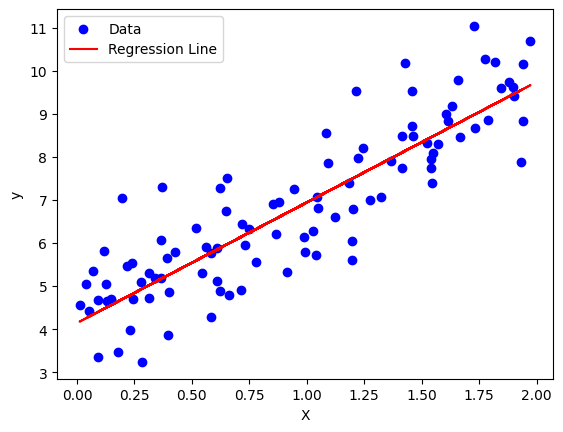

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate some synthetic data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # Feature (100 samples, single feature)
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (y = 4 + 3x + noise)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print model parameters
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot the results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
from scipy.optimize import minimize

def eqn(x):
  return x**2 + x + 2

mymin = minimize(eqn, 0, method='BFGS')

print(eqn(2))
print(mymin)

8
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.75
        x: [-5.000e-01]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4


In [ ]:
from scipy import io
import numpy as np

arr = np.arange(10)

io.savemat('arr.mat', {"vec": arr})

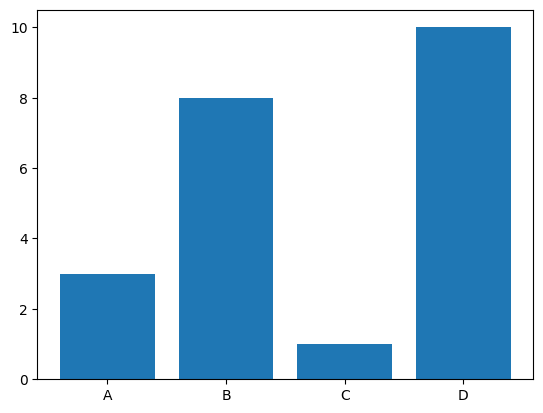

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["A", "B", "C", "D"])
y = np.array([3, 8, 1, 10])

plt.bar(x,y)
plt.show()

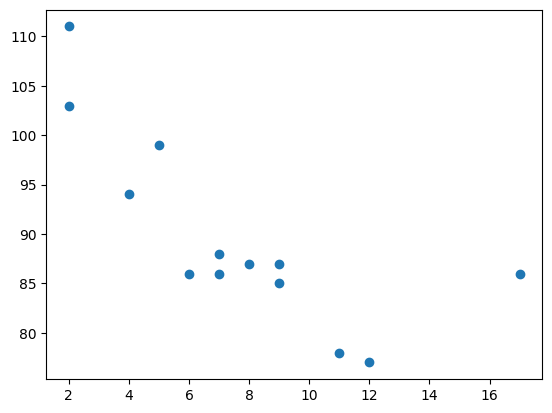

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y)
plt.show()

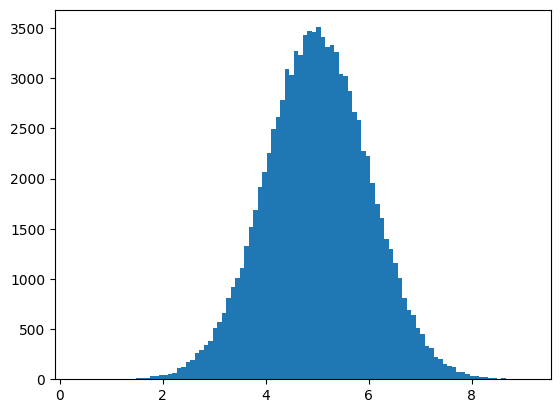

In [ ]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()